# Xarray and Mandyoc output files working together

## Mandyoc output files

After running a subducion model with Mandyoc, a lot of ASCII files are obtained for each time step (not consider the steps files):

Files size:

In [1]:
!du -h run/

61M	run/


<div style="text-align: center;">

<h3>Model: </h3>   

<img src="temp.jpg" style="width: 60%" align="middle">
        
</div>

## Trasform the Mandyoc output in a xr.Dataset

Using ``xarray`` I can transform all of them in a ``xr.Dataset``.

To do that I created a repository called [__modelling_earth__](https://github.com/aguspesce/modelling_earth/)

In [1]:
# Import the reopository
import modelling_earth as me

# Import xarray
import xarray as xr


In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams

# Change default dpi of matplotlib figures for presentation
rcParams["figure.dpi"] = 120

Create a Dataset with ``modelling_earth`` repository:

In [3]:
# I check if the dataset already exists or not. If it doesn't exist, I will make it.
if not os.path.isfile("output_data.nc"): 
    start = time.time()

    # Create the dataset. It function can be use with 2 or 3 dimentions. 
    dataset = me.read_mandyoc_data("run", parameters_file="param_1.5.3_2D.txt")

    # Save dataset as netcdf
    dataset.to_netcdf("output_data.nc")
    end = time.time()
    print("Elapsed time: {:.2f}s".format(end - start))
else:
    print("The file already exists")

The file already exists


__It is nesesary to improve this time__. I know it !!! :)

This dataset has a size of:

In [4]:
!du -h output_data.nc

49M	output_data.nc


__Using netCDF has its advantages...__

* We save some space

* It's easier to load and save data

* It isn't necessary to remember how the information of each node is arranged in the Mandyoc output files.

* It is easier to manage all the information to process and plot.

Xarray [_lazily_ loads data from netCDF files](https://xarray.pydata.org/en/stable/io.html).
This means that data is not loaded into memory until it is requested.

In [5]:
dataset = xr.open_dataset("output_data.nc")

We can use the `load()` method to load the data into memory. Even for large datasets, this process is very swift:

In [6]:
start = time.time()

dataset.load()

end = time.time()
print("Elapsed time: {:.2f}s".format(end - start))

Elapsed time: 0.90s


In [7]:
dataset

<xarray.Dataset>
Dimensions:           (time: 10, x: 401, x_center: 400, z: 176, z_center: 175)
Coordinates:
  * x                 (x) float64 0.0 1e+04 2e+04 ... 3.98e+06 3.99e+06 4e+06
  * x_center          (x_center) float64 5e+03 1.5e+04 ... 3.985e+06 3.995e+06
  * z                 (z) float64 -7e+05 -6.96e+05 -6.92e+05 ... -4e+03 0.0
  * z_center          (z_center) float64 -6.98e+05 -6.94e+05 ... -6e+03 -2e+03
  * time              (time) float64 0.0 7.015 11.11 16.34 ... 38.8 43.96 49.87
    step              (time) int32 0 500 1000 1500 2000 2500 3000 3500 4000 4500
Data variables:
    temperature       (time, x, z) float64 1.501e+03 1.499e+03 ... 0.0 0.0
    density           (time, x, z) float64 3.3e+03 3.3e+03 3.3e+03 ... 1.0 1.0
    radiogenic_heat   (time, x, z) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    viscosity_factor  (time, x, z) float64 4.257e+19 4.318e+19 ... 0.0 0.0
    strain            (time, x, z) float64 0.0 0.0 0.0 ... 1.532 1.032 0.8061
    pressure          (time, x, z) float64 2.091e+10 2.082e+10 ... 1.184e+07
    velocity_x        (time, x, z) float64 8.648e-10 8.552e-10 ... 0.0 0.0
    velocity_z        (time, x, z) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    viscosity         (time, x_center, z_center) float64 4.257e+19 ... 1e+19
Attributes:
    shape:                   [401 176]
    mg:                      1
    stepMAX:                 7000
    timeMAX:                 50000000.0
    dt_MAX:                  10.0e6
    print_step:              500
    visc:                    1.0E19
    visc_MAX:                1.0E24
    visc_MIN:                1.0E19
    n_interfaces:            9
    geoq_on:                 1
    geoq_fac:                100.0
    veloc:                   0.0E-2
    deltaT:                  1500.
    alpha_exp_thermo:        3.28E-5
    kappa:                   1.0E-6
    gravity:                 10.0
    rhom:                    3300.
    H_per_mass:              0.0E-12
    c_heat_capacity:         1250.
    non_linear:              1
    adiabatic_H:             1
    radiogenic_H:            1
    bcv_top_normal:          1
    bcv_top_slip:            0
    bcv_bot_normal:          1
    bcv_bot_slip:            1
    bcv_left_normal:         1
    bcv_left_slip:           1
    bcv_right_normal:        1
    bcv_right_slip:          1
    bcT_top:                 1
    bcT_bot:                 1
    bcT_left:                0
    bcT_right:               0
    rheol:                   6
    T_initial:               3
    H_lito:                  180000.0
    h_air:                   40000.0
    beta_max:                3.0
    ramp_begin:              2000.0E3
    ramp_end:                2200.0E3
    dimension:               2
    region:                  [      0. 4000000. -700000.       0.]
    coords_units:            m
    times_units:             Ma
    temperature_units:       C
    density_units:           kg/m^3
    heat_units:              W/m^3
    viscosity_factor_units:  dimensionless
    viscosity_units:         Pa s
    strain_rate_units:       s^(-1)
    pressure_units:

Because ``xarray`` is based on ``numpy.array``, you can still use most of its methods. 

For example:

In [8]:
dataset.max()

<xarray.Dataset>
Dimensions:           ()
Data variables:
    temperature       float64 1.501e+03
    density           float64 3.4e+03
    radiogenic_heat   float64 1e-12
    viscosity_factor  float64 1e+24
    strain            float64 134.5
    pressure          float64 2.183e+10
    velocity_x        float64 3.468e-08
    velocity_z        float64 2.364e-08
    viscosity         float64 1e+24

## Some functionalities of Xarray

### Selecting data with named dimensions

In Xarray there are many different ways for selecting and indexing data.

``isel()``: Selection based on the index of a coordinate.

``sel()``: Selection based on the value of a coordinate.



For example: 

I want the model values for a time equal to 20 Ma, so I use the `sel()` method.

In [9]:
dataset_20Ma = dataset.sel(time=20)
dataset_20Ma

KeyError: 20.0

The error is because the Dataset doesn't have a time equal to 20:

In [11]:
dataset.time

<xarray.DataArray 'time' (time: 10)>
array([ 0.    ,  7.0152, 11.108 , 16.342 , 22.733 , 29.12  , 34.254 , 38.805 ,
       43.961 , 49.873 ])
Coordinates:
  * time     (time) float64 0.0 7.015 11.11 16.34 ... 34.25 38.8 43.96 49.87
    step     (time) int64 0 500 1000 1500 2000 2500 3000 3500 4000 4500

So, I will look for the closest rime step to 20 Ma:

In [12]:
dataset_20Ma = dataset.sel(time=20,
                           method='nearest',
                           tolerance=3,
                           )
dataset_20Ma
# This Dataset has only the data for a time of 22.733 Ma.

<xarray.Dataset>
Dimensions:           (x: 401, x_center: 400, z: 176, z_center: 175)
Coordinates:
    time              float64 22.73
    step              int64 2000
  * x                 (x) float64 0.0 1e+04 2e+04 ... 3.98e+06 3.99e+06 4e+06
  * z                 (z) float64 -7e+05 -6.96e+05 -6.92e+05 ... -4e+03 0.0
  * x_center          (x_center) float64 5e+03 1.5e+04 ... 3.985e+06 3.995e+06
  * z_center          (z_center) float64 -6.98e+05 -6.94e+05 ... -6e+03 -2e+03
Data variables:
    temperature       (x, z) float64 1.501e+03 1.495e+03 1.49e+03 ... 0.0 0.0
    density           (x, z) float64 3.3e+03 3.3e+03 3.3e+03 ... 1.0 1.0 1.0
    radiogenic_heat   (x, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    viscosity_factor  (x, z) float64 4.288e+19 4.504e+19 4.716e+19 ... 0.0 0.0
    strain            (x, z) float64 32.16 31.42 30.67 ... 1.182 0.8164 0.6481
    pressure          (x, z) float64 2.085e+10 2.073e+10 ... 1.733e+07 1.731e+07
    velocity_x        (x, z) float64 8.648e-10 8.552e-10 8.456e-10 ... 0.0 0.0
    velocity_z        (x, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    viscosity         (x_center, z_center) float64 4.288e+19 4.504e+19 ... 1e+19
Attributes:
    shape:                   [401 176]
    mg:                      1
    stepMAX:                 7000
    timeMAX:                 50000000.0
    dt_MAX:                  10.0e6
    print_step:              500
    visc:                    1.0E19
    visc_MAX:                1.0E24
    visc_MIN:                1.0E19
    n_interfaces:            9
    geoq_on:                 1
    geoq_fac:                100.0
    veloc:                   0.0E-2
    deltaT:                  1500.
    alpha_exp_thermo:        3.28E-5
    kappa:                   1.0E-6
    gravity:                 10.0
    rhom:                    3300.
    H_per_mass:              0.0E-12
    c_heat_capacity:         1250.
    non_linear:              1
    adiabatic_H:             1
    radiogenic_H:            1
    bcv_top_normal:          1
    bcv_top_slip:            0
    bcv_bot_normal:          1
    bcv_bot_slip:            1
    bcv_left_normal:         1
    bcv_left_slip:           1
    bcv_right_normal:        1
    bcv_right_slip:          1
    bcT_top:                 1
    bcT_bot:                 1
    bcT_left:                0
    bcT_right:               0
    rheol:                   6
    T_initial:               3
    H_lito:                  180000.0
    h_air:                   40000.0
    beta_max:                3.0
    ramp_begin:              2000.0E3
    ramp_end:                2200.0E3
    dimension:               2
    region:                  [      0. 4000000. -700000.       0.]
    coords_units:            m
    times_units:             Ma
    temperature_units:       C
    density_units:           kg/m^3
    heat_units:              W/m^3
    viscosity_factor_units:  dimensionless
    viscosity_units:         Pa s
    strain_rate_units:       s^(-1)
    pressure_units:

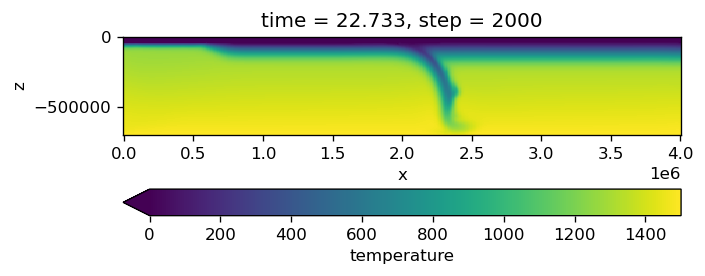

In [13]:
plot_kwargs = {"cbar_kwargs": {"orientation": "horizontal"}}

dataset_20Ma.temperature.plot(x="x", y="z", vmin=0, **plot_kwargs)
plt.gca().set_aspect("equal")

## More sofisticated plots

Let's plot the viscosity along with temperature contours for the previous timestep.

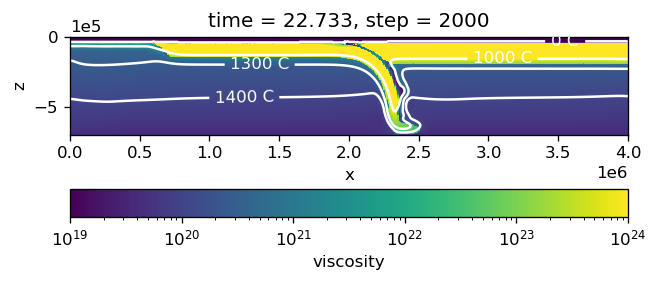

In [15]:
# Plot theviscosity for time=20Ma 
dataset_20Ma.viscosity.plot.pcolormesh(x="x_center", 
                                       y="z_center",
                                       norm=LogNorm(),
                                       **plot_kwargs
                                      )

# Plot the coutour for defined temperatures
kw = {'levels':[0, 1000, 1300, 1400], 'colors':['w']}
cs = dataset_20Ma.temperature.plot.contour(x="x",
                                           y="z",
                                           **kw
                                          )
plt.gca().clabel(cs, inline=1, fontsize=10, fmt="%.0f C")

plt.gca().ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
plt.gca().set_aspect("equal")
plt.show()

## Masking values

Sometimes we might want to mask some values according to a certain condition.

**For example:**

I want to see how the density varies _only_ on the lithosphere.
To do so we need to mask density values on the sticky air layer and the asthenosphere.

Asthenosphere points are above the 1300C isotherm and sticky air layer has density values much lower than lithosphere.

In [16]:
condition = (dataset.temperature < 1300) & (dataset.density > 2000)

# Mask the density DataArray for all time steps.
# The masked values are set to np.nans by default.
density_masked = dataset.density.where(condition)
density_masked

<xarray.DataArray 'density' (time: 10, x: 401, z: 176)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 0.0 7.015 11.11 16.34 ... 34.25 38.8 43.96 49.87
    step     (time) int64 0 500 1000 1500 2000 2500 3000 3500 4000 4500
  * x        (x) float64 0.0 1e+04 2e+04 3e+04 ... 3.98e+06 3.99e+06 4e+06
  * z        (z) float64 -7e+05 -6.96e+05 -6.92e+05 ... -8e+03 -4e+03 0.0

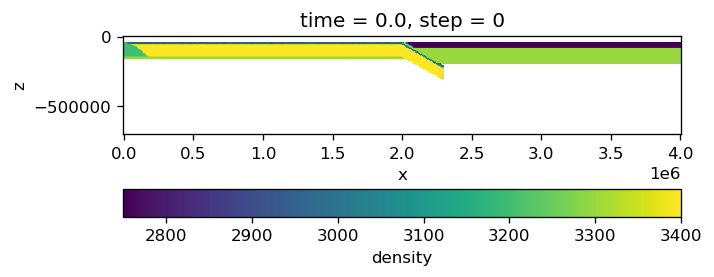

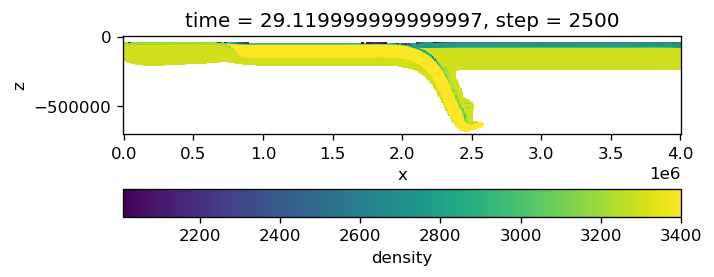

In [17]:
for time in dataset.time.values[::5]:
    density_masked.sel(time=time).plot(x="x", y="z", **plot_kwargs)

    plt.gca().set_aspect("equal")
    plt.show()

## Plot velocities

We can use some functions of the `modelling_earth` library for plotting fluid velocities.

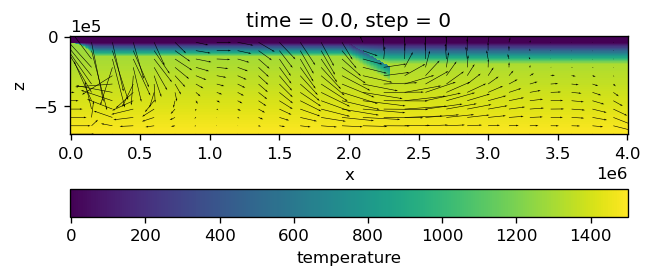

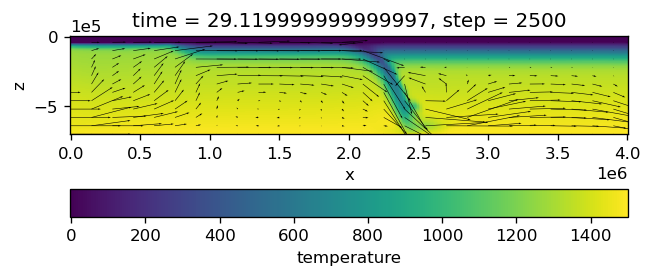

In [18]:
# Get the maximun and munimun temperature values for the entire time
vmin = dataset.temperature.values.min()
vmax = dataset.temperature.values.max()

# Loop to plot the first five steps
for time in dataset.time.values[::5]:

    # Plot temperature
    dataset.temperature.sel(time=time).plot.pcolormesh(
        x="x", y="z",
        vmin=vmin, vmax=vmax, 
        **plot_kwargs
    )
   
    # Plot velocity
    # me.plot_velocity_2d is based on matplotlib.pyplot.quiver
    me.plot_velocity_2d(
        dataset.sel(time=time),
        ax=plt.gca(),
        slice_grid=15,
        width=0.001
    )
    
    plt.gca().ticklabel_format(
        axis="both", style="sci", scilimits=(dataset.x.min(), dataset.z.max())
    )
    plt.gca().set_aspect("equal")
    plt.show()        

### These are some of the functionalities of Xarray... 

On its webside, you can find much more about: 

* Interpolating data

* Indexing and selecting data

* Reshaping, reorganizing and combining data

* Plots options ...


__I encourage you to take a look at xarray docs and try to play with it.__

<div style="text-align: center;">
    
# I hope you found this seminar useful!

</div>